In [1]:
%pip install pillow
%pip install numpy
%pip install scipy
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
# from IPython.display import Image

In [3]:
def boxfilter(n): 
  assert n % 2 == 1
  return np.full((n, n), 1/n/n)
print(boxfilter(3))
# print(boxfilter(4))
print(boxfilter(5))

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [4]:
def gauss1d(sigma): 
  n = round(sigma*6) if round(sigma*6) % 2 == 1 else round(sigma*6) + 1
  a = np.arange(-n//2 + 1, n//2 + 1)
  # print(a)
  a = np.exp(- a**2 / (2*sigma**2))
  # print(a)
  a = a/a.sum()
  # print(a)
  # print(a.sum())
  # print('next')
  return a
print(gauss1d(0.3))
print(gauss1d(0.5))
print(gauss1d(1))
print(gauss1d(2))

[0.00383626 0.99232748 0.00383626]
[0.10650698 0.78698604 0.10650698]
[0.00443305 0.05400558 0.24203623 0.39905028 0.24203623 0.05400558
 0.00443305]
[0.0022182  0.00877313 0.02702316 0.06482519 0.12110939 0.17621312
 0.19967563 0.17621312 0.12110939 0.06482519 0.02702316 0.00877313
 0.0022182 ]


In [5]:
def gauss2d(sigma): 
  a = gauss1d(sigma)[np.newaxis]
  # print(a)
  at = np.transpose(a)
  # print(at)
  a = signal.convolve2d(a, at)
  return a
print(np.array2string(gauss2d(0.5)))
print(np.array2string(gauss2d(1)))

[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]
[[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]]


In [43]:
# replace with manual
def convolve2d_manual(array, filter): 
  output = np.zeros_like(array)
  (k, k) = filter.shape
  # print(k)
  zero_pad_amount = k // 2
  # print(array)
  array = np.pad(array, zero_pad_amount, mode='constant')
  # print(array)
  padded_image = Image.fromarray(array.astype('uint8'))
  # display(padded_image)
  # This method returns an image of the same size as the input image, 
  # output can be adjusted and offset to return an image wit hthe padding needed for the filter
  for i in range(len(array)): 
    for j in range(len(array[0])): 
      submatrix = array[i:i+k, j:j+k]
      if (submatrix.shape == filter.shape): 
        output[i, j] = np.sum(np.multiply(submatrix, filter))
  return output
  # return signal.convolve2d(array, filter)

def gaussconvolve2d_manual(array, sigma): 
  filter = gauss2d(sigma)
  return convolve2d_manual(array, filter)




In [7]:
# from google.colab import files
# uploaded = files.upload()

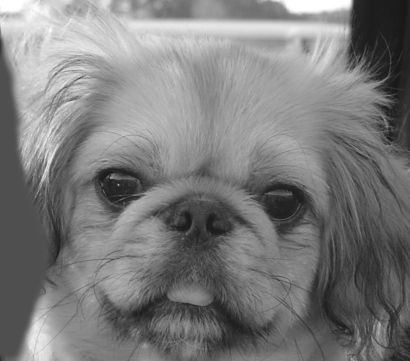

Duration manual:  1.304030418395996
(361, 410)


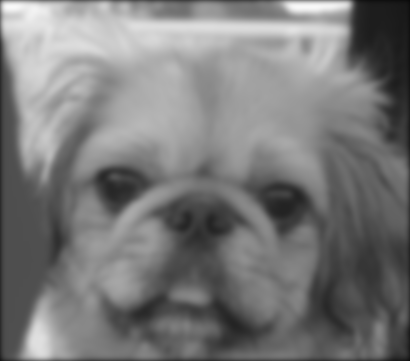

In [52]:
img_as_image = Image.open('dog.jpg')
img_as_image = img_as_image.convert('L')
display(img_as_image)
img = np.asarray(img_as_image)
# print(img)
import time
t1 = time.time()
img_gaus = gaussconvolve2d_manual(img, 3)
print('Duration manual: ', time.time() - t1)
# print(img_gaus)
print(img_gaus.shape)
img_gaus = Image.fromarray(img_gaus.astype('uint8'))
display(img_gaus)

In [45]:
def gaussconvolve2d_scipy(array, sigma): 
    filter = gauss2d(sigma)
    # print(filter.shape)
    # print(array.shape)
    return signal.convolve2d(array, filter)
    return signal.correlate2d(array, filter, 'same')
    # the reason that these two are the same is because the filter is 180 degrees symmetric, which means convolution and correlation are the same

Duration scipy:  0.13599586486816406


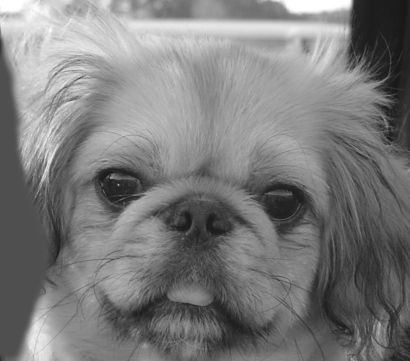

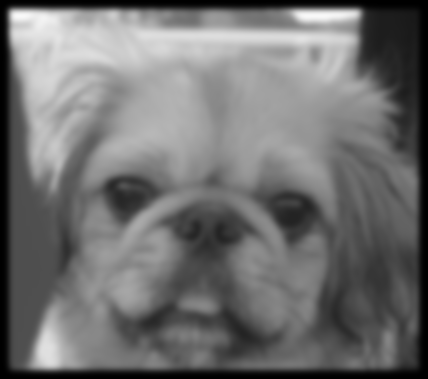

In [56]:
import time
t2 = time.time()
img_convolve_scipy = gaussconvolve2d_scipy(img, 3)
print('Duration scipy: ', time.time() - t2)
display(img_as_image)
img_convolve_scipy_image = Image.fromarray(img_convolve_scipy.astype('uint8'))
display(img_convolve_scipy_image)

In [57]:
import time
t3 = time.time()
_ = gaussconvolve2d_manual(img, 10)
print('Duration manual: ', time.time() - t3)
t4 = time.time()
_ = gaussconvolve2d_scipy(img, 10)
print('Duration scipy: ', time.time() - t4)
t5 = time.time()
_ = 

Duration manual:  2.1660001277923584
Duration scipy:  1.832000732421875
